In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [9]:
#we'll do document allignment
refF = "form.jpg"
print("reading ref : ",refF)
in1 = cv2.imread(retF,cv2.IMREAD_COLOR)
in1 = cv2.cvtColor(in1,cv2.COLOR_BGR2RGB)

imF = "scanned-form.jpg"
print("Reading image to align : ", imF)
im2 = cv2.imread(imF, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
  

reading ref :  form.jpg
Reading image to align :  scanned-form.jpg


Text(0.5, 1.0, 'scanned Form')

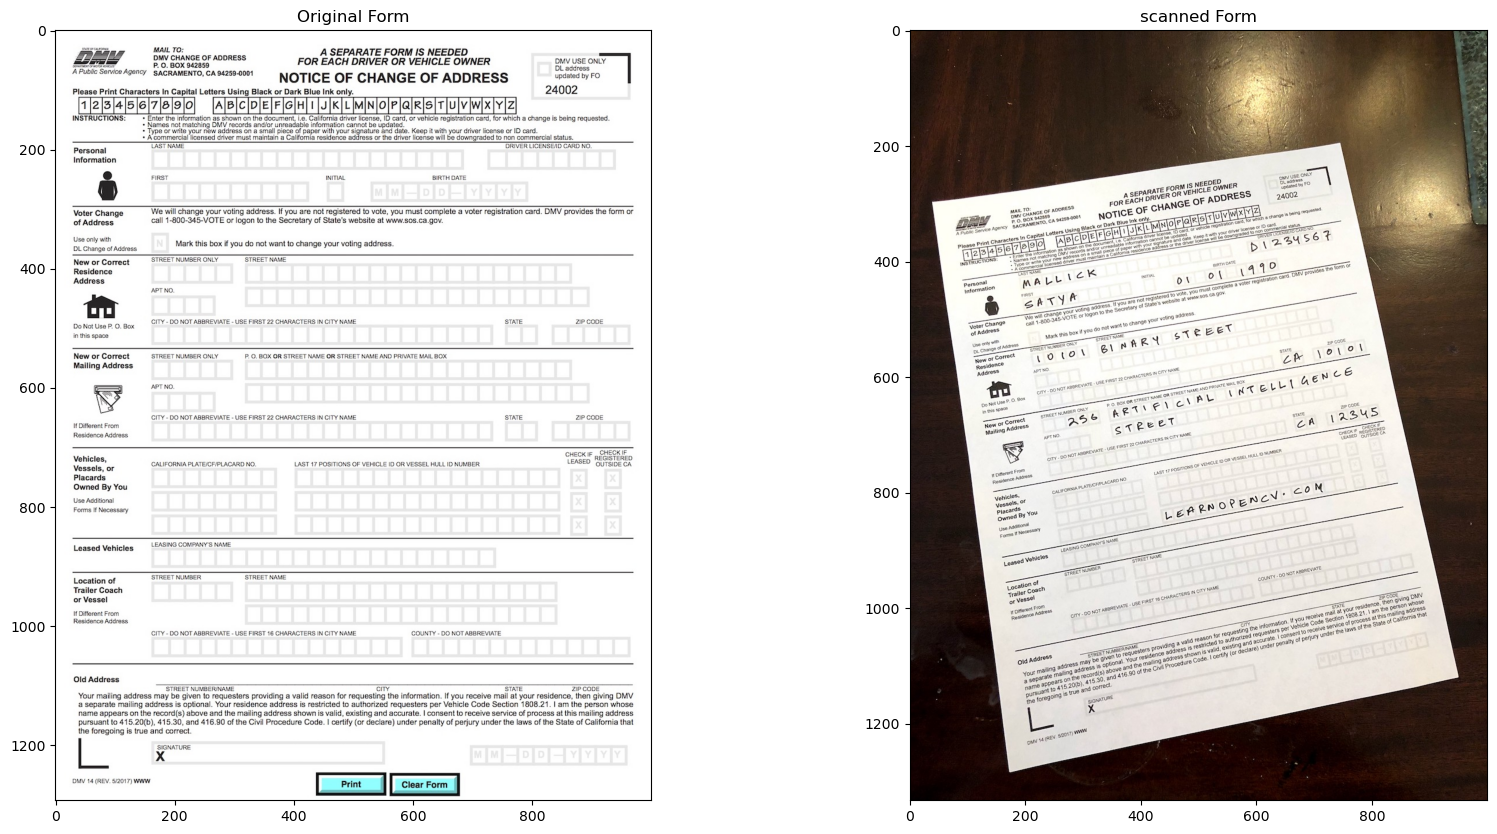

In [13]:
plt.figure(figsize=[20,10]);
plt.subplot(121); plt.imshow(in1); plt.title("Original Form")
plt.subplot(122); plt.imshow(im2); plt.title("scanned Form")


In [16]:
#find keypoints
im1_gray = cv2.cvtColor(in1, cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
#detect orb and compute descriptors
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

# Display 
im1_display = cv2.drawKeypoints(in1, keypoints1, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


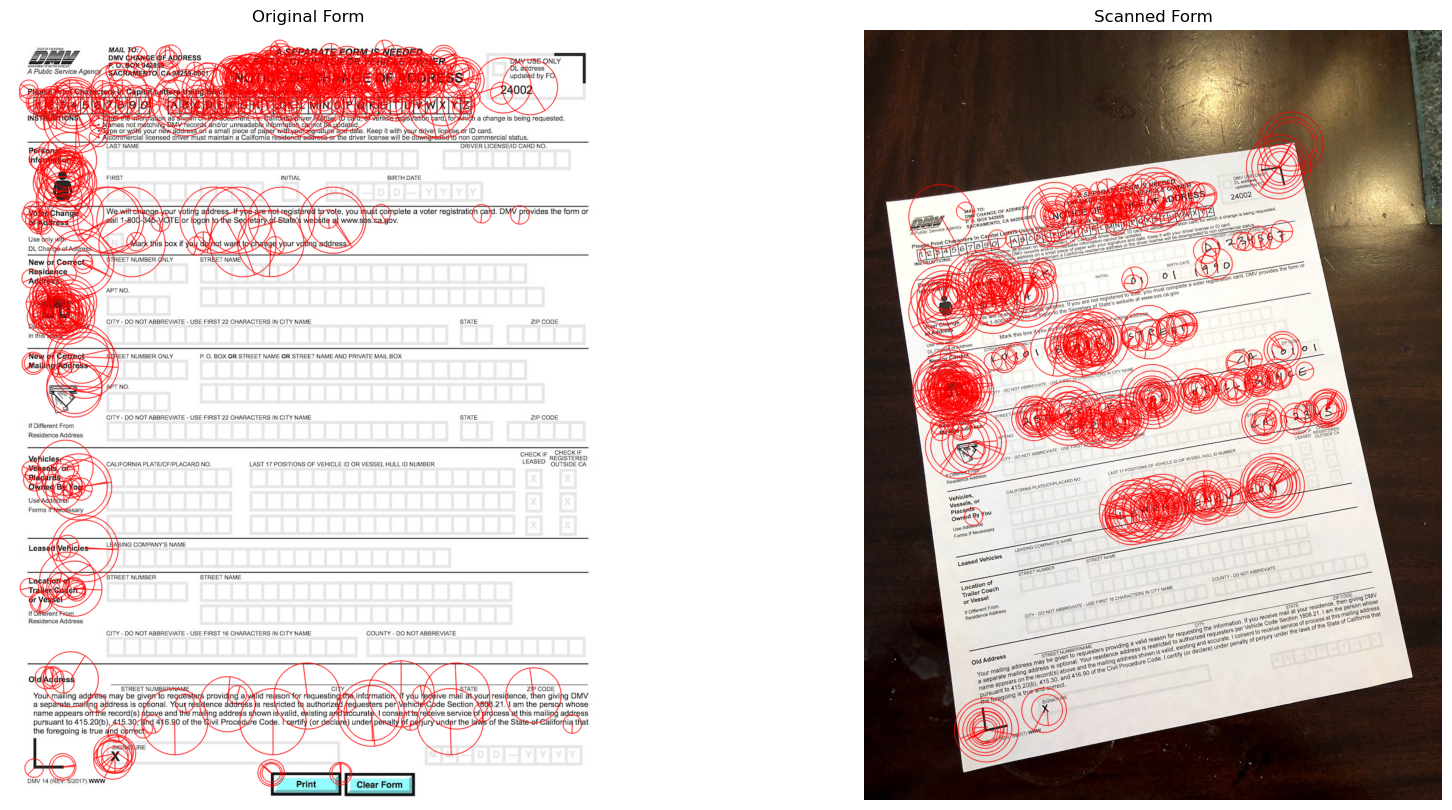

In [17]:
plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original Form");
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned Form");

In [19]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# Match descriptors
matches = matcher.match(descriptors1, descriptors2, None)

# Convert tuple to list
matches = list(matches)

# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]
 

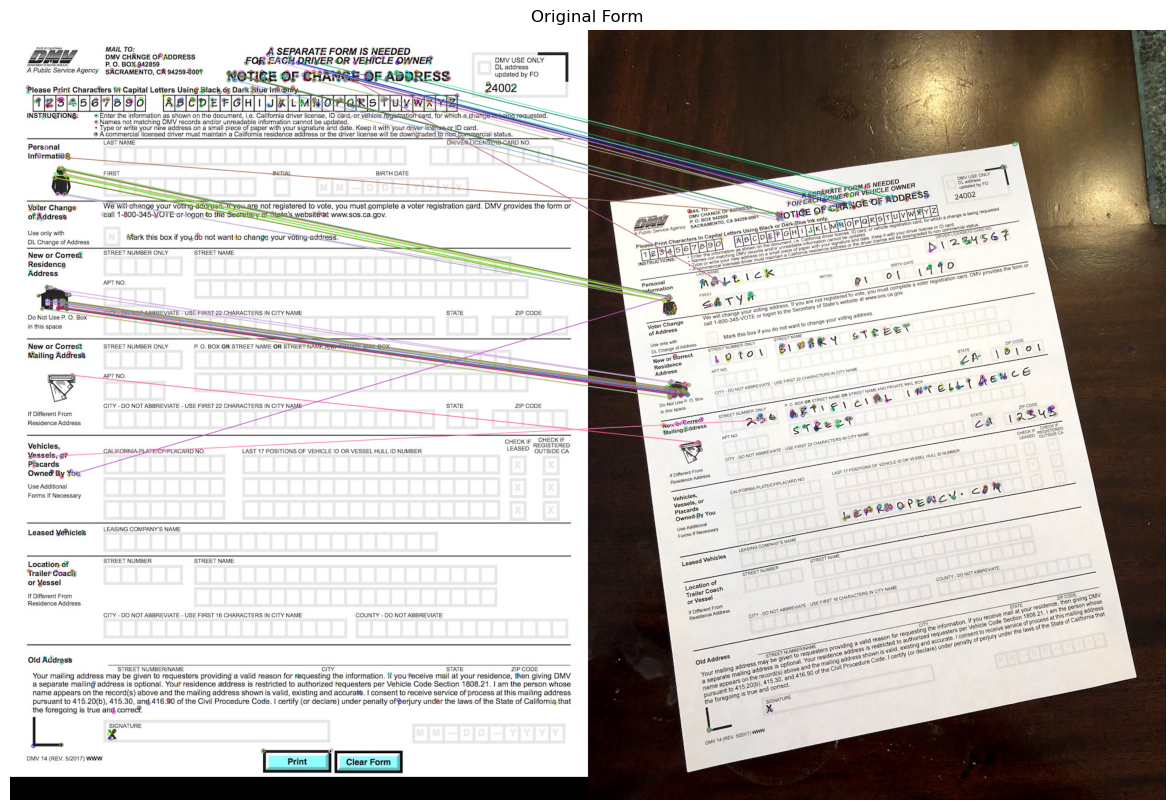

In [21]:
im_matches = cv2.drawMatches(in1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize=[40,10])
plt.imshow(im_matches); plt.axis('off'); plt.title("Original Form");


In [22]:
#find homogrophy
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
  points1[i, :] = keypoints1[match.queryIdx].pt
  points2[i, :] = keypoints2[match.trainIdx].pt
  
# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

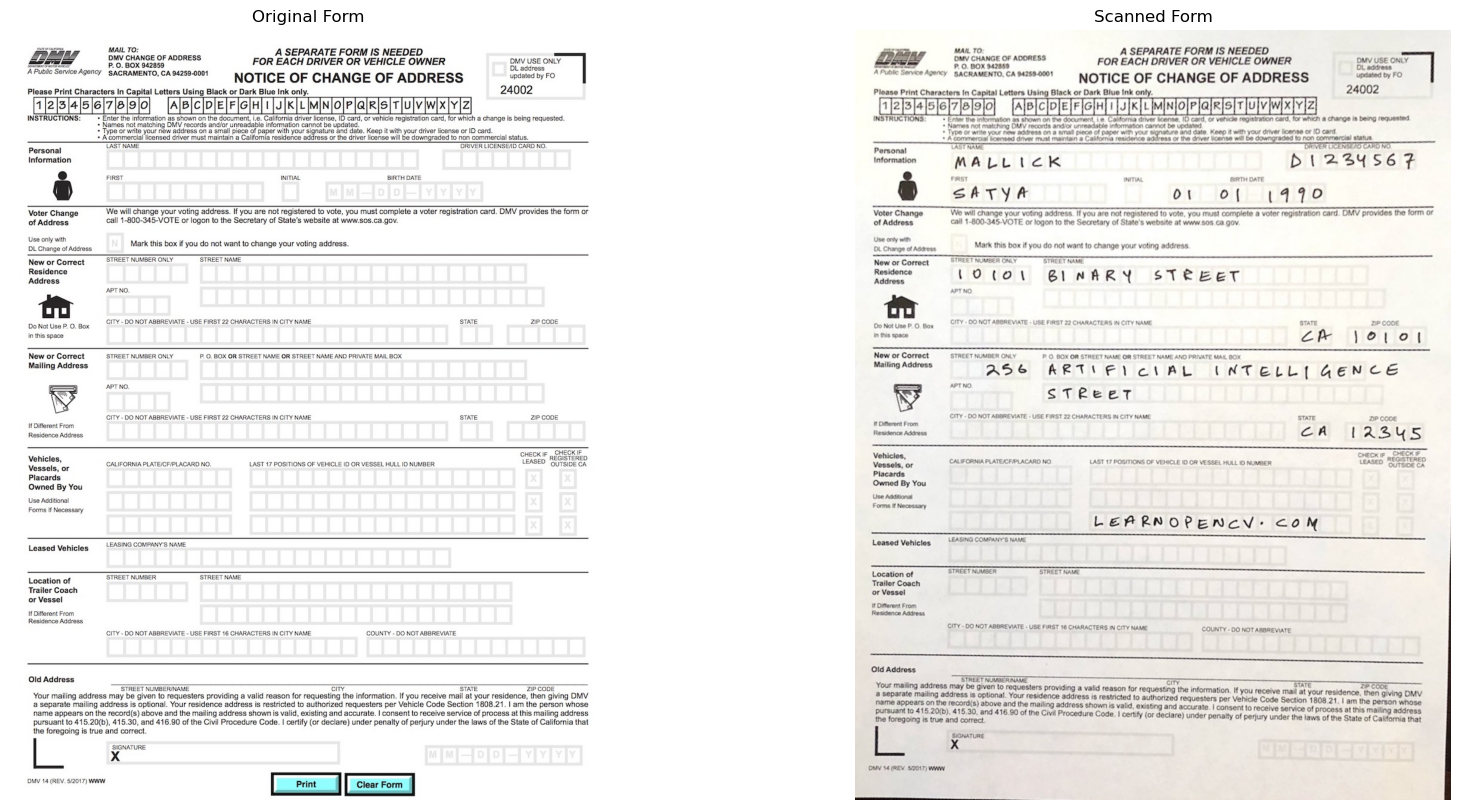

In [25]:
# Use homography to warp image
height, width, channels = in1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))
# Display results 
plt.figure(figsize=[20,10]); 
plt.subplot(121); plt.imshow(in1); plt.axis('off'); plt.title("Original Form");
plt.subplot(122); plt.imshow(im2_reg); plt.axis('off'); plt.title("Scanned Form");